# Predicting malignant versus benign breast cancer cases


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import catboost


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**clean and prepare the data**

In [5]:
df.drop('id', axis=1, inplace = True)
df.drop("Unnamed: 32",axis=1,inplace=True)


In [6]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


In [7]:
print(df.describe().T) #Needs scaling

                         count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se        

In [8]:
Y = df["diagnosis"].values
X = df.drop(labels = ["diagnosis"], axis=1)

In [9]:
L=X.columns

In [10]:
from sklearn import preprocessing
import numpy as np
scaler  = preprocessing.StandardScaler()
X[L] =scaler.fit_transform(X)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


**explore the data**


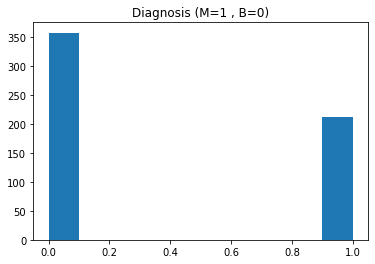

In [11]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

**Choose our variables for the model**


In [12]:
mean_features=list(df.columns[1:11])
se_features=list(df.columns[11:21])
worst_features=list(df.columns[21:31])



In [13]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

In [14]:
df[mean_features].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [15]:
df[se_features].corr()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [16]:
df[worst_features].corr()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [17]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','concave points_mean','radius_worst','perimeter_worst','area_worst']

**Create our training and test set data**


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


**Train our model**


In [20]:
# Import multiple options, to enable us to try out different classifiers

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)) #MultiLayer Perceptron 

In [22]:
# Training the model to fit the data in our training sets

model.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

**Calculate our performance metrics**

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,model.predict(X_test))

array([[87,  2],
       [ 2, 52]], dtype=int64)

In [25]:
y_true = y_test
y_pred = model.predict(X_test)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The recall score is  0.96
The precision score is  0.96


In [26]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("%.2f" %F1)


0.96


In [27]:
# Or this way:
from sklearn.metrics import f1_score

f1_score = f1_score(y_true, y_pred)

print("The f1 score is ", "%.2f" %f1_score)
# And finally, accuracy and AUC:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 

accuracy = accuracy_score(y_true, y_pred)
AUC = roc_auc_score(y_true, y_pred)

print("The accuracy is ", "%.2f" %accuracy)
print("The AUC is ", "%.2f" %AUC)

The f1 score is  0.96
The accuracy is  0.97
The AUC is  0.97


**classification model**


In [28]:
data=X
data['diagnosis']=Y

In [29]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

**regression**

In [30]:
prediction_var
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 95.079%
Cross-Validation Score : 87.719%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.421%
Cross-Validation Score : 94.029%


**Decision Tree Model**


In [31]:
model = DecisionTreeClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.351%
Cross-Validation Score : 91.667%
Cross-Validation Score : 93.275%
Cross-Validation Score : 92.982%
Cross-Validation Score : 92.439%


Here we are over-fitting the model probably due to the large number of predictors. Let use a single predictor, the obvious one is the radius of the cell.



**Randome Forest**

In [32]:
# Use all the features of the nucleus
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.661%
Cross-Validation Score : 87.719%
Cross-Validation Score : 89.912%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.202%
Cross-Validation Score : 93.499%


An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.



In [33]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_worst        0.271560
concave points_mean    0.228577
area_worst             0.217524
radius_worst           0.158022
area_mean              0.050948
perimeter_mean         0.042425
radius_mean            0.030943
dtype: float64


In [34]:
# Using top 5 features
predictor_var = ['concave points_mean','perimeter_worst','area_worst','radius_worst','perimeter_mean','area_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 95.782%
Cross-Validation Score : 86.842%
Cross-Validation Score : 89.474%
Cross-Validation Score : 92.690%
Cross-Validation Score : 92.763%
Cross-Validation Score : 93.149%


**other models**

In [35]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.837%
Cross-Validation Score : 90.351%
Cross-Validation Score : 89.912%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.421%
Cross-Validation Score : 94.383%


In [36]:
model = SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 94.376%
Cross-Validation Score : 88.596%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.690%
Cross-Validation Score : 93.202%
Cross-Validation Score : 93.853%


In [37]:
model = AdaBoostClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 99.297%
Cross-Validation Score : 90.351%
Cross-Validation Score : 90.789%
Cross-Validation Score : 93.567%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.672%


In [45]:
from catboost import CatBoostClassifier

In [46]:
model = CatBoostClassifier()
classification_model(model,data,prediction_var,outcome_var)

Learning rate set to 0.008098
0:	learn: 0.6826842	total: 147ms	remaining: 2m 26s
1:	learn: 0.6706576	total: 149ms	remaining: 1m 14s
2:	learn: 0.6574719	total: 151ms	remaining: 50.2s
3:	learn: 0.6430078	total: 153ms	remaining: 38.1s
4:	learn: 0.6315705	total: 155ms	remaining: 30.8s
5:	learn: 0.6206350	total: 156ms	remaining: 25.9s
6:	learn: 0.6068615	total: 158ms	remaining: 22.4s
7:	learn: 0.5958736	total: 159ms	remaining: 19.8s
8:	learn: 0.5842665	total: 161ms	remaining: 17.7s
9:	learn: 0.5713699	total: 162ms	remaining: 16.1s
10:	learn: 0.5589222	total: 164ms	remaining: 14.7s
11:	learn: 0.5488221	total: 165ms	remaining: 13.6s
12:	learn: 0.5374227	total: 167ms	remaining: 12.6s
13:	learn: 0.5262840	total: 168ms	remaining: 11.8s
14:	learn: 0.5173836	total: 169ms	remaining: 11.1s
15:	learn: 0.5083526	total: 171ms	remaining: 10.5s
16:	learn: 0.4984293	total: 172ms	remaining: 9.96s
17:	learn: 0.4893300	total: 173ms	remaining: 9.46s
18:	learn: 0.4797938	total: 175ms	remaining: 9.03s
19:	learn

247:	learn: 0.0969188	total: 519ms	remaining: 1.57s
248:	learn: 0.0966187	total: 521ms	remaining: 1.57s
249:	learn: 0.0963846	total: 523ms	remaining: 1.57s
250:	learn: 0.0961995	total: 524ms	remaining: 1.56s
251:	learn: 0.0960553	total: 526ms	remaining: 1.56s
252:	learn: 0.0958202	total: 527ms	remaining: 1.56s
253:	learn: 0.0956557	total: 529ms	remaining: 1.55s
254:	learn: 0.0954043	total: 530ms	remaining: 1.55s
255:	learn: 0.0951449	total: 531ms	remaining: 1.54s
256:	learn: 0.0948496	total: 532ms	remaining: 1.54s
257:	learn: 0.0946467	total: 534ms	remaining: 1.54s
258:	learn: 0.0944668	total: 538ms	remaining: 1.54s
259:	learn: 0.0942794	total: 543ms	remaining: 1.54s
260:	learn: 0.0940902	total: 545ms	remaining: 1.54s
261:	learn: 0.0938787	total: 548ms	remaining: 1.54s
262:	learn: 0.0936651	total: 550ms	remaining: 1.54s
263:	learn: 0.0933229	total: 552ms	remaining: 1.54s
264:	learn: 0.0931106	total: 554ms	remaining: 1.54s
265:	learn: 0.0929395	total: 557ms	remaining: 1.53s
266:	learn: 

473:	learn: 0.0668454	total: 861ms	remaining: 956ms
474:	learn: 0.0667544	total: 863ms	remaining: 954ms
475:	learn: 0.0666347	total: 865ms	remaining: 952ms
476:	learn: 0.0665709	total: 867ms	remaining: 950ms
477:	learn: 0.0664566	total: 868ms	remaining: 948ms
478:	learn: 0.0663798	total: 870ms	remaining: 946ms
479:	learn: 0.0663028	total: 872ms	remaining: 944ms
480:	learn: 0.0661969	total: 874ms	remaining: 943ms
481:	learn: 0.0661367	total: 875ms	remaining: 940ms
482:	learn: 0.0660380	total: 876ms	remaining: 938ms
483:	learn: 0.0659571	total: 878ms	remaining: 936ms
484:	learn: 0.0658750	total: 880ms	remaining: 934ms
485:	learn: 0.0657589	total: 881ms	remaining: 932ms
486:	learn: 0.0657146	total: 882ms	remaining: 930ms
487:	learn: 0.0656701	total: 884ms	remaining: 927ms
488:	learn: 0.0655213	total: 885ms	remaining: 925ms
489:	learn: 0.0654094	total: 886ms	remaining: 922ms
490:	learn: 0.0652935	total: 887ms	remaining: 920ms
491:	learn: 0.0652522	total: 889ms	remaining: 918ms
492:	learn: 

686:	learn: 0.0525720	total: 1.2s	remaining: 549ms
687:	learn: 0.0524832	total: 1.21s	remaining: 547ms
688:	learn: 0.0524691	total: 1.21s	remaining: 545ms
689:	learn: 0.0523324	total: 1.21s	remaining: 544ms
690:	learn: 0.0522884	total: 1.21s	remaining: 542ms
691:	learn: 0.0522078	total: 1.21s	remaining: 540ms
692:	learn: 0.0521433	total: 1.21s	remaining: 538ms
693:	learn: 0.0520932	total: 1.22s	remaining: 536ms
694:	learn: 0.0520391	total: 1.22s	remaining: 535ms
695:	learn: 0.0519761	total: 1.22s	remaining: 533ms
696:	learn: 0.0519319	total: 1.22s	remaining: 531ms
697:	learn: 0.0518454	total: 1.22s	remaining: 530ms
698:	learn: 0.0517977	total: 1.23s	remaining: 528ms
699:	learn: 0.0517473	total: 1.23s	remaining: 526ms
700:	learn: 0.0517167	total: 1.23s	remaining: 524ms
701:	learn: 0.0516257	total: 1.23s	remaining: 522ms
702:	learn: 0.0515581	total: 1.23s	remaining: 520ms
703:	learn: 0.0514722	total: 1.23s	remaining: 518ms
704:	learn: 0.0514170	total: 1.23s	remaining: 516ms
705:	learn: 0

919:	learn: 0.0393318	total: 1.54s	remaining: 134ms
920:	learn: 0.0392542	total: 1.55s	remaining: 133ms
921:	learn: 0.0392020	total: 1.55s	remaining: 131ms
922:	learn: 0.0391372	total: 1.55s	remaining: 129ms
923:	learn: 0.0391086	total: 1.55s	remaining: 128ms
924:	learn: 0.0390432	total: 1.55s	remaining: 126ms
925:	learn: 0.0390032	total: 1.56s	remaining: 124ms
926:	learn: 0.0389232	total: 1.56s	remaining: 123ms
927:	learn: 0.0388405	total: 1.56s	remaining: 121ms
928:	learn: 0.0387773	total: 1.56s	remaining: 119ms
929:	learn: 0.0387237	total: 1.56s	remaining: 118ms
930:	learn: 0.0386330	total: 1.57s	remaining: 116ms
931:	learn: 0.0385843	total: 1.57s	remaining: 114ms
932:	learn: 0.0385253	total: 1.57s	remaining: 113ms
933:	learn: 0.0384563	total: 1.57s	remaining: 111ms
934:	learn: 0.0384166	total: 1.57s	remaining: 109ms
935:	learn: 0.0383940	total: 1.57s	remaining: 108ms
936:	learn: 0.0383700	total: 1.57s	remaining: 106ms
937:	learn: 0.0382793	total: 1.58s	remaining: 104ms
938:	learn: 

95:	learn: 0.1886901	total: 159ms	remaining: 1.5s
96:	learn: 0.1869242	total: 160ms	remaining: 1.49s
97:	learn: 0.1858340	total: 162ms	remaining: 1.49s
98:	learn: 0.1840121	total: 164ms	remaining: 1.49s
99:	learn: 0.1822723	total: 166ms	remaining: 1.49s
100:	learn: 0.1809779	total: 167ms	remaining: 1.49s
101:	learn: 0.1791846	total: 169ms	remaining: 1.48s
102:	learn: 0.1779137	total: 170ms	remaining: 1.48s
103:	learn: 0.1762405	total: 172ms	remaining: 1.48s
104:	learn: 0.1745250	total: 174ms	remaining: 1.48s
105:	learn: 0.1732574	total: 175ms	remaining: 1.48s
106:	learn: 0.1719925	total: 177ms	remaining: 1.48s
107:	learn: 0.1709105	total: 178ms	remaining: 1.47s
108:	learn: 0.1692366	total: 180ms	remaining: 1.47s
109:	learn: 0.1675557	total: 181ms	remaining: 1.47s
110:	learn: 0.1664330	total: 183ms	remaining: 1.47s
111:	learn: 0.1650459	total: 185ms	remaining: 1.47s
112:	learn: 0.1636089	total: 187ms	remaining: 1.47s
113:	learn: 0.1625692	total: 188ms	remaining: 1.46s
114:	learn: 0.1614

321:	learn: 0.0738940	total: 498ms	remaining: 1.05s
322:	learn: 0.0737593	total: 501ms	remaining: 1.05s
323:	learn: 0.0735629	total: 503ms	remaining: 1.05s
324:	learn: 0.0734365	total: 504ms	remaining: 1.05s
325:	learn: 0.0732539	total: 506ms	remaining: 1.05s
326:	learn: 0.0731807	total: 508ms	remaining: 1.04s
327:	learn: 0.0730775	total: 510ms	remaining: 1.04s
328:	learn: 0.0729650	total: 512ms	remaining: 1.04s
329:	learn: 0.0727502	total: 514ms	remaining: 1.04s
330:	learn: 0.0726379	total: 516ms	remaining: 1.04s
331:	learn: 0.0724970	total: 518ms	remaining: 1.04s
332:	learn: 0.0724068	total: 520ms	remaining: 1.04s
333:	learn: 0.0722783	total: 522ms	remaining: 1.04s
334:	learn: 0.0721703	total: 524ms	remaining: 1.04s
335:	learn: 0.0719679	total: 525ms	remaining: 1.04s
336:	learn: 0.0718249	total: 527ms	remaining: 1.04s
337:	learn: 0.0716680	total: 529ms	remaining: 1.04s
338:	learn: 0.0715640	total: 531ms	remaining: 1.03s
339:	learn: 0.0714677	total: 533ms	remaining: 1.03s
340:	learn: 

490:	learn: 0.0565560	total: 841ms	remaining: 872ms
491:	learn: 0.0565082	total: 844ms	remaining: 871ms
492:	learn: 0.0563738	total: 846ms	remaining: 870ms
493:	learn: 0.0562554	total: 848ms	remaining: 869ms
494:	learn: 0.0561811	total: 850ms	remaining: 867ms
495:	learn: 0.0560817	total: 852ms	remaining: 866ms
496:	learn: 0.0559841	total: 854ms	remaining: 864ms
497:	learn: 0.0559111	total: 856ms	remaining: 863ms
498:	learn: 0.0558530	total: 858ms	remaining: 861ms
499:	learn: 0.0557826	total: 859ms	remaining: 859ms
500:	learn: 0.0557253	total: 861ms	remaining: 857ms
501:	learn: 0.0556626	total: 862ms	remaining: 856ms
502:	learn: 0.0556104	total: 864ms	remaining: 853ms
503:	learn: 0.0554803	total: 865ms	remaining: 852ms
504:	learn: 0.0553717	total: 867ms	remaining: 850ms
505:	learn: 0.0552986	total: 868ms	remaining: 848ms
506:	learn: 0.0552440	total: 869ms	remaining: 845ms
507:	learn: 0.0551361	total: 870ms	remaining: 843ms
508:	learn: 0.0550495	total: 872ms	remaining: 841ms
509:	learn: 

729:	learn: 0.0409996	total: 1.18s	remaining: 438ms
730:	learn: 0.0409650	total: 1.19s	remaining: 437ms
731:	learn: 0.0409008	total: 1.19s	remaining: 435ms
732:	learn: 0.0408153	total: 1.19s	remaining: 433ms
733:	learn: 0.0406976	total: 1.19s	remaining: 432ms
734:	learn: 0.0406389	total: 1.19s	remaining: 430ms
735:	learn: 0.0405776	total: 1.19s	remaining: 429ms
736:	learn: 0.0405431	total: 1.2s	remaining: 427ms
737:	learn: 0.0404813	total: 1.2s	remaining: 425ms
738:	learn: 0.0404487	total: 1.2s	remaining: 424ms
739:	learn: 0.0404016	total: 1.2s	remaining: 422ms
740:	learn: 0.0403711	total: 1.2s	remaining: 421ms
741:	learn: 0.0403360	total: 1.21s	remaining: 419ms
742:	learn: 0.0403132	total: 1.21s	remaining: 417ms
743:	learn: 0.0402592	total: 1.21s	remaining: 416ms
744:	learn: 0.0402287	total: 1.21s	remaining: 414ms
745:	learn: 0.0401839	total: 1.21s	remaining: 412ms
746:	learn: 0.0401447	total: 1.21s	remaining: 410ms
747:	learn: 0.0400927	total: 1.21s	remaining: 409ms
748:	learn: 0.040

975:	learn: 0.0301012	total: 1.53s	remaining: 37.5ms
976:	learn: 0.0300635	total: 1.53s	remaining: 36ms
977:	learn: 0.0300066	total: 1.53s	remaining: 34.4ms
978:	learn: 0.0299730	total: 1.53s	remaining: 32.8ms
979:	learn: 0.0299351	total: 1.53s	remaining: 31.3ms
980:	learn: 0.0298855	total: 1.53s	remaining: 29.7ms
981:	learn: 0.0298633	total: 1.53s	remaining: 28.1ms
982:	learn: 0.0298129	total: 1.54s	remaining: 26.6ms
983:	learn: 0.0298004	total: 1.54s	remaining: 25ms
984:	learn: 0.0297797	total: 1.54s	remaining: 23.4ms
985:	learn: 0.0297393	total: 1.54s	remaining: 21.9ms
986:	learn: 0.0297131	total: 1.54s	remaining: 20.3ms
987:	learn: 0.0296923	total: 1.54s	remaining: 18.8ms
988:	learn: 0.0296599	total: 1.55s	remaining: 17.2ms
989:	learn: 0.0296359	total: 1.55s	remaining: 15.6ms
990:	learn: 0.0296176	total: 1.55s	remaining: 14.1ms
991:	learn: 0.0295937	total: 1.55s	remaining: 12.5ms
992:	learn: 0.0295638	total: 1.55s	remaining: 10.9ms
993:	learn: 0.0295403	total: 1.55s	remaining: 9.38

148:	learn: 0.1288041	total: 271ms	remaining: 1.55s
149:	learn: 0.1281339	total: 274ms	remaining: 1.55s
150:	learn: 0.1272500	total: 275ms	remaining: 1.55s
151:	learn: 0.1268042	total: 278ms	remaining: 1.55s
152:	learn: 0.1259273	total: 280ms	remaining: 1.55s
153:	learn: 0.1252850	total: 283ms	remaining: 1.55s
154:	learn: 0.1245410	total: 285ms	remaining: 1.55s
155:	learn: 0.1237259	total: 287ms	remaining: 1.55s
156:	learn: 0.1228475	total: 289ms	remaining: 1.55s
157:	learn: 0.1222186	total: 291ms	remaining: 1.55s
158:	learn: 0.1217286	total: 292ms	remaining: 1.55s
159:	learn: 0.1208946	total: 294ms	remaining: 1.54s
160:	learn: 0.1200812	total: 295ms	remaining: 1.54s
161:	learn: 0.1193865	total: 297ms	remaining: 1.54s
162:	learn: 0.1185873	total: 300ms	remaining: 1.54s
163:	learn: 0.1180258	total: 302ms	remaining: 1.54s
164:	learn: 0.1175640	total: 304ms	remaining: 1.54s
165:	learn: 0.1169713	total: 305ms	remaining: 1.53s
166:	learn: 0.1162363	total: 307ms	remaining: 1.53s
167:	learn: 

358:	learn: 0.0666490	total: 611ms	remaining: 1.09s
359:	learn: 0.0665695	total: 613ms	remaining: 1.09s
360:	learn: 0.0663886	total: 614ms	remaining: 1.09s
361:	learn: 0.0662733	total: 616ms	remaining: 1.08s
362:	learn: 0.0661468	total: 617ms	remaining: 1.08s
363:	learn: 0.0660530	total: 619ms	remaining: 1.08s
364:	learn: 0.0658210	total: 621ms	remaining: 1.08s
365:	learn: 0.0656979	total: 623ms	remaining: 1.08s
366:	learn: 0.0655758	total: 624ms	remaining: 1.08s
367:	learn: 0.0654756	total: 626ms	remaining: 1.07s
368:	learn: 0.0653594	total: 629ms	remaining: 1.07s
369:	learn: 0.0652146	total: 630ms	remaining: 1.07s
370:	learn: 0.0650915	total: 632ms	remaining: 1.07s
371:	learn: 0.0650032	total: 633ms	remaining: 1.07s
372:	learn: 0.0649735	total: 635ms	remaining: 1.07s
373:	learn: 0.0649083	total: 636ms	remaining: 1.06s
374:	learn: 0.0647942	total: 637ms	remaining: 1.06s
375:	learn: 0.0646657	total: 639ms	remaining: 1.06s
376:	learn: 0.0645929	total: 640ms	remaining: 1.06s
377:	learn: 

565:	learn: 0.0485428	total: 954ms	remaining: 731ms
566:	learn: 0.0484149	total: 956ms	remaining: 730ms
567:	learn: 0.0483350	total: 958ms	remaining: 728ms
568:	learn: 0.0482582	total: 959ms	remaining: 726ms
569:	learn: 0.0482251	total: 960ms	remaining: 724ms
570:	learn: 0.0480745	total: 961ms	remaining: 722ms
571:	learn: 0.0479910	total: 963ms	remaining: 720ms
572:	learn: 0.0479462	total: 965ms	remaining: 719ms
573:	learn: 0.0478672	total: 966ms	remaining: 717ms
574:	learn: 0.0477822	total: 968ms	remaining: 715ms
575:	learn: 0.0477185	total: 969ms	remaining: 713ms
576:	learn: 0.0476681	total: 971ms	remaining: 712ms
577:	learn: 0.0475816	total: 973ms	remaining: 710ms
578:	learn: 0.0474714	total: 974ms	remaining: 708ms
579:	learn: 0.0474120	total: 976ms	remaining: 707ms
580:	learn: 0.0473447	total: 978ms	remaining: 705ms
581:	learn: 0.0472956	total: 979ms	remaining: 703ms
582:	learn: 0.0472520	total: 981ms	remaining: 702ms
583:	learn: 0.0471623	total: 983ms	remaining: 700ms
584:	learn: 

796:	learn: 0.0359845	total: 1.29s	remaining: 330ms
797:	learn: 0.0359464	total: 1.29s	remaining: 328ms
798:	learn: 0.0359175	total: 1.3s	remaining: 326ms
799:	learn: 0.0358824	total: 1.3s	remaining: 325ms
800:	learn: 0.0358317	total: 1.3s	remaining: 323ms
801:	learn: 0.0357939	total: 1.3s	remaining: 322ms
802:	learn: 0.0357713	total: 1.3s	remaining: 320ms
803:	learn: 0.0357036	total: 1.31s	remaining: 319ms
804:	learn: 0.0356448	total: 1.31s	remaining: 317ms
805:	learn: 0.0355990	total: 1.31s	remaining: 316ms
806:	learn: 0.0355551	total: 1.31s	remaining: 314ms
807:	learn: 0.0355417	total: 1.31s	remaining: 312ms
808:	learn: 0.0355239	total: 1.31s	remaining: 311ms
809:	learn: 0.0354827	total: 1.32s	remaining: 309ms
810:	learn: 0.0353996	total: 1.32s	remaining: 307ms
811:	learn: 0.0353613	total: 1.32s	remaining: 306ms
812:	learn: 0.0353292	total: 1.32s	remaining: 304ms
813:	learn: 0.0353037	total: 1.32s	remaining: 302ms
814:	learn: 0.0352618	total: 1.32s	remaining: 300ms
815:	learn: 0.035

Learning rate set to 0.00736
0:	learn: 0.6833080	total: 1.8ms	remaining: 1.8s
1:	learn: 0.6708427	total: 3.86ms	remaining: 1.92s
2:	learn: 0.6587944	total: 5.58ms	remaining: 1.85s
3:	learn: 0.6456989	total: 7.31ms	remaining: 1.82s
4:	learn: 0.6346054	total: 9.48ms	remaining: 1.89s
5:	learn: 0.6257207	total: 11.8ms	remaining: 1.96s
6:	learn: 0.6126172	total: 13.7ms	remaining: 1.95s
7:	learn: 0.6018502	total: 15.7ms	remaining: 1.94s
8:	learn: 0.5922792	total: 18.2ms	remaining: 2s
9:	learn: 0.5814906	total: 20.8ms	remaining: 2.06s
10:	learn: 0.5700237	total: 22.4ms	remaining: 2.01s
11:	learn: 0.5615157	total: 23.9ms	remaining: 1.96s
12:	learn: 0.5522189	total: 25.3ms	remaining: 1.92s
13:	learn: 0.5422546	total: 26.7ms	remaining: 1.88s
14:	learn: 0.5342012	total: 28.7ms	remaining: 1.88s
15:	learn: 0.5241553	total: 30.3ms	remaining: 1.86s
16:	learn: 0.5155952	total: 31.8ms	remaining: 1.84s
17:	learn: 0.5074872	total: 34.3ms	remaining: 1.87s
18:	learn: 0.4983786	total: 36.5ms	remaining: 1.88

215:	learn: 0.1181843	total: 332ms	remaining: 1.21s
216:	learn: 0.1177648	total: 334ms	remaining: 1.21s
217:	learn: 0.1173455	total: 336ms	remaining: 1.2s
218:	learn: 0.1170028	total: 337ms	remaining: 1.2s
219:	learn: 0.1167140	total: 339ms	remaining: 1.2s
220:	learn: 0.1163169	total: 341ms	remaining: 1.2s
221:	learn: 0.1160271	total: 343ms	remaining: 1.2s
222:	learn: 0.1155424	total: 344ms	remaining: 1.2s
223:	learn: 0.1150933	total: 345ms	remaining: 1.2s
224:	learn: 0.1148015	total: 347ms	remaining: 1.19s
225:	learn: 0.1144767	total: 349ms	remaining: 1.19s
226:	learn: 0.1141694	total: 350ms	remaining: 1.19s
227:	learn: 0.1139022	total: 351ms	remaining: 1.19s
228:	learn: 0.1135427	total: 353ms	remaining: 1.19s
229:	learn: 0.1133243	total: 355ms	remaining: 1.19s
230:	learn: 0.1129111	total: 356ms	remaining: 1.19s
231:	learn: 0.1127270	total: 358ms	remaining: 1.18s
232:	learn: 0.1124226	total: 359ms	remaining: 1.18s
233:	learn: 0.1122142	total: 361ms	remaining: 1.18s
234:	learn: 0.11190

420:	learn: 0.0772898	total: 672ms	remaining: 925ms
421:	learn: 0.0771263	total: 676ms	remaining: 925ms
422:	learn: 0.0770008	total: 677ms	remaining: 924ms
423:	learn: 0.0768801	total: 678ms	remaining: 922ms
424:	learn: 0.0767930	total: 680ms	remaining: 919ms
425:	learn: 0.0766779	total: 681ms	remaining: 917ms
426:	learn: 0.0765411	total: 682ms	remaining: 915ms
427:	learn: 0.0763831	total: 684ms	remaining: 914ms
428:	learn: 0.0762826	total: 686ms	remaining: 913ms
429:	learn: 0.0761449	total: 687ms	remaining: 911ms
430:	learn: 0.0761010	total: 689ms	remaining: 909ms
431:	learn: 0.0759938	total: 690ms	remaining: 908ms
432:	learn: 0.0759197	total: 692ms	remaining: 906ms
433:	learn: 0.0757599	total: 694ms	remaining: 905ms
434:	learn: 0.0756739	total: 695ms	remaining: 903ms
435:	learn: 0.0755441	total: 696ms	remaining: 901ms
436:	learn: 0.0754765	total: 698ms	remaining: 899ms
437:	learn: 0.0753957	total: 699ms	remaining: 897ms
438:	learn: 0.0752390	total: 701ms	remaining: 896ms
439:	learn: 

633:	learn: 0.0577022	total: 1.01s	remaining: 585ms
634:	learn: 0.0576006	total: 1.01s	remaining: 584ms
635:	learn: 0.0575307	total: 1.02s	remaining: 582ms
636:	learn: 0.0574776	total: 1.02s	remaining: 581ms
637:	learn: 0.0574001	total: 1.02s	remaining: 580ms
638:	learn: 0.0573488	total: 1.02s	remaining: 578ms
639:	learn: 0.0572959	total: 1.02s	remaining: 577ms
640:	learn: 0.0572542	total: 1.03s	remaining: 575ms
641:	learn: 0.0571895	total: 1.03s	remaining: 574ms
642:	learn: 0.0571059	total: 1.03s	remaining: 573ms
643:	learn: 0.0569814	total: 1.03s	remaining: 572ms
644:	learn: 0.0568910	total: 1.04s	remaining: 570ms
645:	learn: 0.0568123	total: 1.04s	remaining: 569ms
646:	learn: 0.0567748	total: 1.04s	remaining: 568ms
647:	learn: 0.0567251	total: 1.04s	remaining: 566ms
648:	learn: 0.0566793	total: 1.04s	remaining: 565ms
649:	learn: 0.0565574	total: 1.04s	remaining: 563ms
650:	learn: 0.0564612	total: 1.05s	remaining: 561ms
651:	learn: 0.0563567	total: 1.05s	remaining: 560ms
652:	learn: 

830:	learn: 0.0454920	total: 1.35s	remaining: 275ms
831:	learn: 0.0454355	total: 1.35s	remaining: 273ms
832:	learn: 0.0453875	total: 1.35s	remaining: 272ms
833:	learn: 0.0453481	total: 1.36s	remaining: 270ms
834:	learn: 0.0452648	total: 1.36s	remaining: 268ms
835:	learn: 0.0452348	total: 1.36s	remaining: 267ms
836:	learn: 0.0451942	total: 1.36s	remaining: 265ms
837:	learn: 0.0451506	total: 1.36s	remaining: 263ms
838:	learn: 0.0451223	total: 1.36s	remaining: 262ms
839:	learn: 0.0450769	total: 1.36s	remaining: 260ms
840:	learn: 0.0450449	total: 1.37s	remaining: 258ms
841:	learn: 0.0450139	total: 1.37s	remaining: 257ms
842:	learn: 0.0449826	total: 1.37s	remaining: 255ms
843:	learn: 0.0449183	total: 1.37s	remaining: 254ms
844:	learn: 0.0448581	total: 1.37s	remaining: 252ms
845:	learn: 0.0447899	total: 1.38s	remaining: 251ms
846:	learn: 0.0447577	total: 1.38s	remaining: 249ms
847:	learn: 0.0446746	total: 1.38s	remaining: 247ms
848:	learn: 0.0446111	total: 1.38s	remaining: 246ms
849:	learn: 

9:	learn: 0.5847202	total: 20.1ms	remaining: 1.99s
10:	learn: 0.5739819	total: 21.7ms	remaining: 1.95s
11:	learn: 0.5635783	total: 23.1ms	remaining: 1.9s
12:	learn: 0.5549990	total: 25ms	remaining: 1.89s
13:	learn: 0.5452657	total: 27.3ms	remaining: 1.93s
14:	learn: 0.5371043	total: 29.2ms	remaining: 1.92s
15:	learn: 0.5284717	total: 31.1ms	remaining: 1.91s
16:	learn: 0.5198948	total: 33.1ms	remaining: 1.91s
17:	learn: 0.5110154	total: 35.4ms	remaining: 1.93s
18:	learn: 0.5020147	total: 37.4ms	remaining: 1.93s
19:	learn: 0.4940756	total: 39.5ms	remaining: 1.94s
20:	learn: 0.4858952	total: 41.5ms	remaining: 1.94s
21:	learn: 0.4778171	total: 43.3ms	remaining: 1.92s
22:	learn: 0.4693248	total: 45.6ms	remaining: 1.94s
23:	learn: 0.4622579	total: 47.3ms	remaining: 1.92s
24:	learn: 0.4558136	total: 48.7ms	remaining: 1.9s
25:	learn: 0.4481376	total: 50.2ms	remaining: 1.88s
26:	learn: 0.4411047	total: 51.5ms	remaining: 1.85s
27:	learn: 0.4359417	total: 53.3ms	remaining: 1.85s
28:	learn: 0.4302

216:	learn: 0.1157864	total: 363ms	remaining: 1.31s
217:	learn: 0.1155557	total: 366ms	remaining: 1.31s
218:	learn: 0.1152492	total: 367ms	remaining: 1.31s
219:	learn: 0.1149208	total: 369ms	remaining: 1.31s
220:	learn: 0.1145929	total: 370ms	remaining: 1.3s
221:	learn: 0.1141045	total: 371ms	remaining: 1.3s
222:	learn: 0.1136986	total: 372ms	remaining: 1.3s
223:	learn: 0.1134149	total: 374ms	remaining: 1.29s
224:	learn: 0.1131031	total: 376ms	remaining: 1.29s
225:	learn: 0.1125434	total: 378ms	remaining: 1.29s
226:	learn: 0.1122151	total: 380ms	remaining: 1.29s
227:	learn: 0.1119740	total: 382ms	remaining: 1.29s
228:	learn: 0.1116665	total: 384ms	remaining: 1.29s
229:	learn: 0.1113635	total: 386ms	remaining: 1.29s
230:	learn: 0.1110510	total: 388ms	remaining: 1.29s
231:	learn: 0.1108198	total: 389ms	remaining: 1.29s
232:	learn: 0.1105295	total: 391ms	remaining: 1.29s
233:	learn: 0.1101596	total: 394ms	remaining: 1.29s
234:	learn: 0.1098450	total: 395ms	remaining: 1.28s
235:	learn: 0.1

436:	learn: 0.0761271	total: 706ms	remaining: 910ms
437:	learn: 0.0759822	total: 708ms	remaining: 909ms
438:	learn: 0.0758589	total: 710ms	remaining: 907ms
439:	learn: 0.0757221	total: 713ms	remaining: 907ms
440:	learn: 0.0756168	total: 714ms	remaining: 906ms
441:	learn: 0.0755203	total: 717ms	remaining: 905ms
442:	learn: 0.0753612	total: 719ms	remaining: 904ms
443:	learn: 0.0753329	total: 721ms	remaining: 903ms
444:	learn: 0.0752517	total: 723ms	remaining: 902ms
445:	learn: 0.0751578	total: 725ms	remaining: 901ms
446:	learn: 0.0750160	total: 727ms	remaining: 899ms
447:	learn: 0.0749904	total: 729ms	remaining: 898ms
448:	learn: 0.0748913	total: 730ms	remaining: 896ms
449:	learn: 0.0747685	total: 732ms	remaining: 895ms
450:	learn: 0.0746781	total: 733ms	remaining: 893ms
451:	learn: 0.0746240	total: 735ms	remaining: 891ms
452:	learn: 0.0744725	total: 736ms	remaining: 889ms
453:	learn: 0.0744169	total: 737ms	remaining: 887ms
454:	learn: 0.0742739	total: 739ms	remaining: 885ms
455:	learn: 

662:	learn: 0.0589120	total: 1.05s	remaining: 533ms
663:	learn: 0.0588942	total: 1.05s	remaining: 532ms
664:	learn: 0.0588701	total: 1.05s	remaining: 530ms
665:	learn: 0.0588534	total: 1.05s	remaining: 528ms
666:	learn: 0.0587609	total: 1.05s	remaining: 526ms
667:	learn: 0.0586709	total: 1.05s	remaining: 525ms
668:	learn: 0.0586180	total: 1.06s	remaining: 523ms
669:	learn: 0.0585632	total: 1.06s	remaining: 522ms
670:	learn: 0.0584815	total: 1.06s	remaining: 520ms
671:	learn: 0.0584247	total: 1.06s	remaining: 519ms
672:	learn: 0.0583506	total: 1.06s	remaining: 517ms
673:	learn: 0.0582552	total: 1.06s	remaining: 516ms
674:	learn: 0.0581983	total: 1.07s	remaining: 514ms
675:	learn: 0.0581540	total: 1.07s	remaining: 513ms
676:	learn: 0.0581152	total: 1.07s	remaining: 511ms
677:	learn: 0.0580727	total: 1.07s	remaining: 510ms
678:	learn: 0.0580251	total: 1.07s	remaining: 508ms
679:	learn: 0.0579967	total: 1.08s	remaining: 507ms
680:	learn: 0.0579655	total: 1.08s	remaining: 506ms
681:	learn: 

851:	learn: 0.0477416	total: 1.39s	remaining: 242ms
852:	learn: 0.0476902	total: 1.39s	remaining: 240ms
853:	learn: 0.0476446	total: 1.39s	remaining: 238ms
854:	learn: 0.0475703	total: 1.39s	remaining: 237ms
855:	learn: 0.0475292	total: 1.4s	remaining: 235ms
856:	learn: 0.0474988	total: 1.4s	remaining: 233ms
857:	learn: 0.0474704	total: 1.4s	remaining: 232ms
858:	learn: 0.0473860	total: 1.4s	remaining: 230ms
859:	learn: 0.0473227	total: 1.4s	remaining: 228ms
860:	learn: 0.0472547	total: 1.4s	remaining: 227ms
861:	learn: 0.0472124	total: 1.41s	remaining: 225ms
862:	learn: 0.0471734	total: 1.41s	remaining: 223ms
863:	learn: 0.0471460	total: 1.41s	remaining: 222ms
864:	learn: 0.0470876	total: 1.41s	remaining: 220ms
865:	learn: 0.0470266	total: 1.41s	remaining: 219ms
866:	learn: 0.0469902	total: 1.42s	remaining: 217ms
867:	learn: 0.0469509	total: 1.42s	remaining: 216ms
868:	learn: 0.0469074	total: 1.42s	remaining: 214ms
869:	learn: 0.0468711	total: 1.42s	remaining: 212ms
870:	learn: 0.0468

26:	learn: 0.4439760	total: 43.6ms	remaining: 1.57s
27:	learn: 0.4389670	total: 46.1ms	remaining: 1.6s
28:	learn: 0.4334707	total: 47.8ms	remaining: 1.6s
29:	learn: 0.4283416	total: 49.9ms	remaining: 1.61s
30:	learn: 0.4231646	total: 51.6ms	remaining: 1.61s
31:	learn: 0.4173562	total: 53.3ms	remaining: 1.61s
32:	learn: 0.4117127	total: 56.1ms	remaining: 1.64s
33:	learn: 0.4051362	total: 58.2ms	remaining: 1.65s
34:	learn: 0.3989764	total: 59.5ms	remaining: 1.64s
35:	learn: 0.3931233	total: 60.9ms	remaining: 1.63s
36:	learn: 0.3879516	total: 62.2ms	remaining: 1.62s
37:	learn: 0.3829947	total: 64.2ms	remaining: 1.62s
38:	learn: 0.3785530	total: 65.5ms	remaining: 1.61s
39:	learn: 0.3735072	total: 66.8ms	remaining: 1.6s
40:	learn: 0.3681443	total: 68.2ms	remaining: 1.59s
41:	learn: 0.3633748	total: 70.1ms	remaining: 1.6s
42:	learn: 0.3583499	total: 72.4ms	remaining: 1.61s
43:	learn: 0.3536287	total: 74.3ms	remaining: 1.61s
44:	learn: 0.3496403	total: 76.4ms	remaining: 1.62s
45:	learn: 0.344

215:	learn: 0.1170471	total: 383ms	remaining: 1.39s
216:	learn: 0.1166857	total: 384ms	remaining: 1.39s
217:	learn: 0.1163804	total: 386ms	remaining: 1.38s
218:	learn: 0.1159338	total: 388ms	remaining: 1.38s
219:	learn: 0.1155484	total: 391ms	remaining: 1.39s
220:	learn: 0.1150617	total: 393ms	remaining: 1.38s
221:	learn: 0.1147666	total: 395ms	remaining: 1.38s
222:	learn: 0.1143759	total: 396ms	remaining: 1.38s
223:	learn: 0.1140468	total: 398ms	remaining: 1.38s
224:	learn: 0.1137528	total: 400ms	remaining: 1.38s
225:	learn: 0.1133910	total: 404ms	remaining: 1.38s
226:	learn: 0.1130930	total: 407ms	remaining: 1.38s
227:	learn: 0.1127188	total: 409ms	remaining: 1.39s
228:	learn: 0.1124215	total: 412ms	remaining: 1.39s
229:	learn: 0.1121309	total: 413ms	remaining: 1.38s
230:	learn: 0.1118475	total: 415ms	remaining: 1.38s
231:	learn: 0.1116407	total: 416ms	remaining: 1.38s
232:	learn: 0.1113788	total: 418ms	remaining: 1.37s
233:	learn: 0.1111029	total: 420ms	remaining: 1.37s
234:	learn: 

392:	learn: 0.0804098	total: 723ms	remaining: 1.12s
393:	learn: 0.0802670	total: 726ms	remaining: 1.12s
394:	learn: 0.0801142	total: 728ms	remaining: 1.11s
395:	learn: 0.0800511	total: 729ms	remaining: 1.11s
396:	learn: 0.0799009	total: 731ms	remaining: 1.11s
397:	learn: 0.0798145	total: 732ms	remaining: 1.11s
398:	learn: 0.0797418	total: 734ms	remaining: 1.1s
399:	learn: 0.0796096	total: 735ms	remaining: 1.1s
400:	learn: 0.0794870	total: 737ms	remaining: 1.1s
401:	learn: 0.0794067	total: 739ms	remaining: 1.1s
402:	learn: 0.0791913	total: 741ms	remaining: 1.1s
403:	learn: 0.0790467	total: 743ms	remaining: 1.1s
404:	learn: 0.0789525	total: 745ms	remaining: 1.09s
405:	learn: 0.0788462	total: 748ms	remaining: 1.09s
406:	learn: 0.0786498	total: 750ms	remaining: 1.09s
407:	learn: 0.0785461	total: 753ms	remaining: 1.09s
408:	learn: 0.0784058	total: 755ms	remaining: 1.09s
409:	learn: 0.0781871	total: 758ms	remaining: 1.09s
410:	learn: 0.0779919	total: 760ms	remaining: 1.09s
411:	learn: 0.0779

582:	learn: 0.0612545	total: 1.06s	remaining: 761ms
583:	learn: 0.0611961	total: 1.06s	remaining: 759ms
584:	learn: 0.0611306	total: 1.07s	remaining: 757ms
585:	learn: 0.0610527	total: 1.07s	remaining: 755ms
586:	learn: 0.0609889	total: 1.07s	remaining: 753ms
587:	learn: 0.0609303	total: 1.07s	remaining: 751ms
588:	learn: 0.0608569	total: 1.07s	remaining: 749ms
589:	learn: 0.0607482	total: 1.07s	remaining: 748ms
590:	learn: 0.0606244	total: 1.08s	remaining: 746ms
591:	learn: 0.0605617	total: 1.08s	remaining: 744ms
592:	learn: 0.0604840	total: 1.08s	remaining: 742ms
593:	learn: 0.0604444	total: 1.08s	remaining: 740ms
594:	learn: 0.0603634	total: 1.08s	remaining: 738ms
595:	learn: 0.0603201	total: 1.08s	remaining: 736ms
596:	learn: 0.0602629	total: 1.09s	remaining: 734ms
597:	learn: 0.0602092	total: 1.09s	remaining: 732ms
598:	learn: 0.0601502	total: 1.09s	remaining: 730ms
599:	learn: 0.0600716	total: 1.09s	remaining: 728ms
600:	learn: 0.0600102	total: 1.09s	remaining: 725ms
601:	learn: 

759:	learn: 0.0498113	total: 1.41s	remaining: 444ms
760:	learn: 0.0497733	total: 1.41s	remaining: 443ms
761:	learn: 0.0497299	total: 1.41s	remaining: 441ms
762:	learn: 0.0496529	total: 1.41s	remaining: 439ms
763:	learn: 0.0496101	total: 1.41s	remaining: 437ms
764:	learn: 0.0495326	total: 1.42s	remaining: 435ms
765:	learn: 0.0494922	total: 1.42s	remaining: 433ms
766:	learn: 0.0494079	total: 1.42s	remaining: 431ms
767:	learn: 0.0493581	total: 1.42s	remaining: 429ms
768:	learn: 0.0492601	total: 1.42s	remaining: 427ms
769:	learn: 0.0492304	total: 1.42s	remaining: 425ms
770:	learn: 0.0491952	total: 1.43s	remaining: 423ms
771:	learn: 0.0491494	total: 1.43s	remaining: 422ms
772:	learn: 0.0490793	total: 1.43s	remaining: 420ms
773:	learn: 0.0490092	total: 1.43s	remaining: 418ms
774:	learn: 0.0489668	total: 1.43s	remaining: 417ms
775:	learn: 0.0489249	total: 1.44s	remaining: 415ms
776:	learn: 0.0488902	total: 1.44s	remaining: 413ms
777:	learn: 0.0488443	total: 1.44s	remaining: 411ms
778:	learn: 

950:	learn: 0.0394823	total: 1.74s	remaining: 89.9ms
951:	learn: 0.0394436	total: 1.75s	remaining: 88.1ms
952:	learn: 0.0393996	total: 1.75s	remaining: 86.2ms
953:	learn: 0.0393320	total: 1.75s	remaining: 84.4ms
954:	learn: 0.0392874	total: 1.75s	remaining: 82.6ms
955:	learn: 0.0392103	total: 1.75s	remaining: 80.8ms
956:	learn: 0.0391816	total: 1.76s	remaining: 78.9ms
957:	learn: 0.0390770	total: 1.76s	remaining: 77.1ms
958:	learn: 0.0390423	total: 1.76s	remaining: 75.3ms
959:	learn: 0.0389957	total: 1.76s	remaining: 73.5ms
960:	learn: 0.0389622	total: 1.76s	remaining: 71.6ms
961:	learn: 0.0388708	total: 1.77s	remaining: 69.8ms
962:	learn: 0.0387935	total: 1.77s	remaining: 68ms
963:	learn: 0.0387773	total: 1.77s	remaining: 66.2ms
964:	learn: 0.0386926	total: 1.77s	remaining: 64.3ms
965:	learn: 0.0386674	total: 1.77s	remaining: 62.5ms
966:	learn: 0.0386159	total: 1.77s	remaining: 60.6ms
967:	learn: 0.0385902	total: 1.78s	remaining: 58.7ms
968:	learn: 0.0385612	total: 1.78s	remaining: 56

117:	learn: 0.1605816	total: 218ms	remaining: 1.63s
118:	learn: 0.1597933	total: 220ms	remaining: 1.63s
119:	learn: 0.1584381	total: 222ms	remaining: 1.63s
120:	learn: 0.1575061	total: 223ms	remaining: 1.62s
121:	learn: 0.1564385	total: 224ms	remaining: 1.61s
122:	learn: 0.1554596	total: 226ms	remaining: 1.61s
123:	learn: 0.1545319	total: 228ms	remaining: 1.61s
124:	learn: 0.1537349	total: 230ms	remaining: 1.61s
125:	learn: 0.1528729	total: 232ms	remaining: 1.61s
126:	learn: 0.1518680	total: 234ms	remaining: 1.61s
127:	learn: 0.1509134	total: 237ms	remaining: 1.61s
128:	learn: 0.1500573	total: 239ms	remaining: 1.61s
129:	learn: 0.1493517	total: 241ms	remaining: 1.61s
130:	learn: 0.1484190	total: 244ms	remaining: 1.62s
131:	learn: 0.1477284	total: 247ms	remaining: 1.63s
132:	learn: 0.1470391	total: 249ms	remaining: 1.63s
133:	learn: 0.1462550	total: 251ms	remaining: 1.62s
134:	learn: 0.1453936	total: 252ms	remaining: 1.62s
135:	learn: 0.1446105	total: 254ms	remaining: 1.61s
136:	learn: 

300:	learn: 0.0864345	total: 554ms	remaining: 1.29s
301:	learn: 0.0862281	total: 556ms	remaining: 1.28s
302:	learn: 0.0860994	total: 558ms	remaining: 1.28s
303:	learn: 0.0859778	total: 560ms	remaining: 1.28s
304:	learn: 0.0858407	total: 562ms	remaining: 1.28s
305:	learn: 0.0855599	total: 564ms	remaining: 1.28s
306:	learn: 0.0854431	total: 566ms	remaining: 1.28s
307:	learn: 0.0852916	total: 567ms	remaining: 1.27s
308:	learn: 0.0850912	total: 569ms	remaining: 1.27s
309:	learn: 0.0849218	total: 571ms	remaining: 1.27s
310:	learn: 0.0847239	total: 573ms	remaining: 1.27s
311:	learn: 0.0844723	total: 575ms	remaining: 1.27s
312:	learn: 0.0843398	total: 577ms	remaining: 1.26s
313:	learn: 0.0841423	total: 578ms	remaining: 1.26s
314:	learn: 0.0839522	total: 581ms	remaining: 1.26s
315:	learn: 0.0837590	total: 582ms	remaining: 1.26s
316:	learn: 0.0836252	total: 584ms	remaining: 1.26s
317:	learn: 0.0834294	total: 585ms	remaining: 1.25s
318:	learn: 0.0832390	total: 586ms	remaining: 1.25s
319:	learn: 

493:	learn: 0.0651138	total: 896ms	remaining: 918ms
494:	learn: 0.0650588	total: 899ms	remaining: 918ms
495:	learn: 0.0650296	total: 902ms	remaining: 916ms
496:	learn: 0.0649730	total: 904ms	remaining: 914ms
497:	learn: 0.0648593	total: 905ms	remaining: 913ms
498:	learn: 0.0648008	total: 907ms	remaining: 911ms
499:	learn: 0.0647172	total: 909ms	remaining: 909ms
500:	learn: 0.0645936	total: 911ms	remaining: 908ms
501:	learn: 0.0645217	total: 913ms	remaining: 906ms
502:	learn: 0.0644074	total: 915ms	remaining: 905ms
503:	learn: 0.0643316	total: 918ms	remaining: 903ms
504:	learn: 0.0642351	total: 919ms	remaining: 901ms
505:	learn: 0.0641656	total: 921ms	remaining: 899ms
506:	learn: 0.0641121	total: 922ms	remaining: 897ms
507:	learn: 0.0640108	total: 924ms	remaining: 895ms
508:	learn: 0.0639564	total: 927ms	remaining: 894ms
509:	learn: 0.0638980	total: 929ms	remaining: 892ms
510:	learn: 0.0638538	total: 931ms	remaining: 891ms
511:	learn: 0.0637367	total: 933ms	remaining: 889ms
512:	learn: 

722:	learn: 0.0504397	total: 1.41s	remaining: 540ms
723:	learn: 0.0503597	total: 1.41s	remaining: 539ms
724:	learn: 0.0503073	total: 1.42s	remaining: 537ms
725:	learn: 0.0502370	total: 1.42s	remaining: 535ms
726:	learn: 0.0501969	total: 1.42s	remaining: 534ms
727:	learn: 0.0501346	total: 1.42s	remaining: 532ms
728:	learn: 0.0500266	total: 1.43s	remaining: 531ms
729:	learn: 0.0499275	total: 1.43s	remaining: 529ms
730:	learn: 0.0498873	total: 1.43s	remaining: 527ms
731:	learn: 0.0498040	total: 1.44s	remaining: 526ms
732:	learn: 0.0497580	total: 1.44s	remaining: 524ms
733:	learn: 0.0497105	total: 1.44s	remaining: 522ms
734:	learn: 0.0496736	total: 1.44s	remaining: 520ms
735:	learn: 0.0495604	total: 1.45s	remaining: 519ms
736:	learn: 0.0495033	total: 1.45s	remaining: 517ms
737:	learn: 0.0494679	total: 1.45s	remaining: 515ms
738:	learn: 0.0493937	total: 1.45s	remaining: 513ms
739:	learn: 0.0493651	total: 1.46s	remaining: 511ms
740:	learn: 0.0493308	total: 1.46s	remaining: 510ms
741:	learn: 

939:	learn: 0.0382065	total: 1.93s	remaining: 123ms
940:	learn: 0.0381781	total: 1.93s	remaining: 121ms
941:	learn: 0.0381537	total: 1.93s	remaining: 119ms
942:	learn: 0.0381177	total: 1.93s	remaining: 117ms
943:	learn: 0.0380963	total: 1.93s	remaining: 115ms
944:	learn: 0.0380066	total: 1.94s	remaining: 113ms
945:	learn: 0.0379759	total: 1.94s	remaining: 111ms
946:	learn: 0.0379432	total: 1.94s	remaining: 109ms
947:	learn: 0.0378766	total: 1.94s	remaining: 107ms
948:	learn: 0.0378504	total: 1.95s	remaining: 105ms
949:	learn: 0.0377692	total: 1.95s	remaining: 103ms
950:	learn: 0.0377195	total: 1.95s	remaining: 100ms
951:	learn: 0.0376933	total: 1.95s	remaining: 98.4ms
952:	learn: 0.0376555	total: 1.95s	remaining: 96.4ms
953:	learn: 0.0375822	total: 1.96s	remaining: 94.3ms
954:	learn: 0.0375391	total: 1.96s	remaining: 92.3ms
955:	learn: 0.0374943	total: 1.96s	remaining: 90.3ms
956:	learn: 0.0374437	total: 1.96s	remaining: 88.2ms
957:	learn: 0.0374098	total: 1.97s	remaining: 86.2ms
958:	

# deep learning 


In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [50]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [166]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 0.8815 - accuracy: 0.4155 - val_loss: 0.7619 - val_accuracy: 0.4895
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7657 - accuracy: 0.5469 - val_loss: 0.6416 - val_accuracy: 0.6573
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.6573 - val_loss: 0.5439 - val_accuracy: 0.7762
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5383 - accuracy: 0.7441 - val_loss: 0.4672 - val_accuracy: 0.8671
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4777 - accuracy: 0.8122 - val_loss: 0.4074 - val_accuracy: 0.8741
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4252 - accuracy: 0.8709 - val_loss: 0.3611 - val_accuracy: 0.9021
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3891 - accuracy: 0.8873 - val_loss: 0.3245 - val_accuracy: 0.9371
Epoch 8/100
7/7 [=========

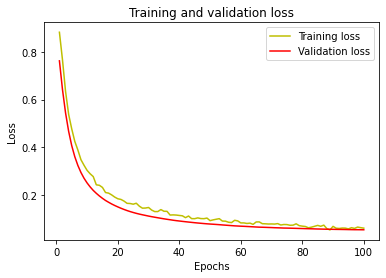

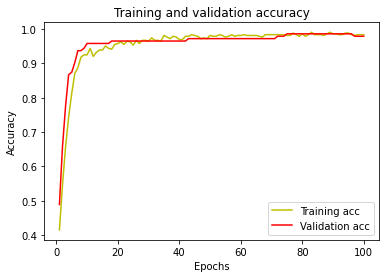

In [167]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

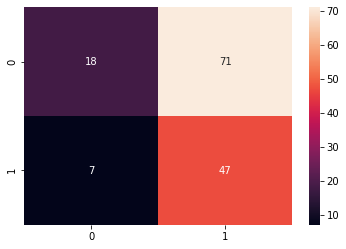

In [68]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)


# Predicting Breast Cancer with Pytorch

In [69]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from collections import Counter


In [70]:
predictors = df.iloc[:, 1:31]
predictors

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [71]:
labels = df.iloc[:, 0:1]
labels

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [72]:
predictors_train, predictors_test, labels_train, labels_test = train_test_split(predictors,labels,test_size = 0.20)

So far the data is stored into pandas data frames. As we will implement a deep learning model using Tensor Flow, the data must be transformed into tensors. First, converting the pandas data frames into arrays:

In [73]:
type(np.array(predictors_train))



numpy.ndarray

In [74]:
type(np.array(labels_train))


numpy.ndarray

The model will be implemented using PyTorch, so the next step is to transform the arrays into a torch element:

In [75]:
predictors_train = torch.tensor(np.array(predictors_train), dtype=torch.float)
labels_train = torch.tensor(np.array(labels_train), dtype = torch.float)
df_tf = torch.utils.data.TensorDataset(predictors_train, labels_train)
type(df_tf)

torch.utils.data.dataset.TensorDataset

Pytorch trains the models in mini-batches. There is a class named DataLoader to perform the iterations on the dataset. The batch_size parameter gives the number of samples considered when adjusting the weights of the model:



In [76]:
train_loader = torch.utils.data.DataLoader(df_tf, batch_size=15, shuffle=True)

##  Implementing and evaluating the model

In this project, a neural network with two hidden layers will be implemented. To implement such model, we need the following:

* Structure of the model (defining number of layers, neurons, activation functions);
* Choose a training criterion;
* Choose an optimizer.

The neural network model definition is as follows:



* Input features = 29 (we have 29 features in the predictors dataset).
* 2 Hidden layers with 15 neurons each
* Output layer with one neuron, having output labels 0 (benign tumor) and 1 (malignant tumor)
* ReLu, a non linear activation function for the internal layers
* Sigmoid, a non linear activation function for the output layer, returning a probability between 0 and 1

In [77]:
classifier = nn.Sequential(
  
    nn.Linear(in_features=30, out_features=15),
    nn.ReLU(),
    nn.Linear(15, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
)

Now, we must choose the training criterion for the neural network. As this is a binary classification task, a binary cross entropy criterion was the choice:

In [78]:
criterion = nn.BCELoss()


Third, and final step is to choose the optimizer. Adam optimization algorithm is a very popular choice in deep learning problems. This is an extension of the stochastic gradient descent algorithm, but different than the SGD algorithm, Adam optimizer does not maintain the same learning rate during training.

In [79]:
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

### Training the model



The weights updated is run 100 times, as shown in the for loop below:



In [80]:

for epoch in range(100):
  #To store the error:
    run_loss = 0.
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()

        outputs = classifier(inputs) 
        error = criterion(outputs, labels)
        error.backward()
        optimizer.step() 

        run_loss += error.item()
    print('Epoch %3d: loss %.5f' % (epoch+1, run_loss/len(train_loader)))

Epoch   1: loss 1.19307
Epoch   2: loss 0.50176
Epoch   3: loss 0.39219
Epoch   4: loss 0.31715
Epoch   5: loss 0.30708
Epoch   6: loss 0.28715
Epoch   7: loss 0.24524
Epoch   8: loss 0.24913
Epoch   9: loss 0.22753
Epoch  10: loss 0.23828
Epoch  11: loss 0.24563
Epoch  12: loss 0.21953
Epoch  13: loss 0.21238
Epoch  14: loss 0.23293
Epoch  15: loss 0.22647
Epoch  16: loss 0.20261
Epoch  17: loss 0.20264
Epoch  18: loss 0.19451
Epoch  19: loss 0.19747
Epoch  20: loss 0.18681
Epoch  21: loss 0.20188
Epoch  22: loss 0.20669
Epoch  23: loss 0.23208
Epoch  24: loss 0.22876
Epoch  25: loss 0.18791
Epoch  26: loss 0.18788
Epoch  27: loss 0.18771
Epoch  28: loss 0.18875
Epoch  29: loss 0.18601
Epoch  30: loss 0.18947
Epoch  31: loss 0.17602
Epoch  32: loss 0.20442
Epoch  33: loss 0.19019
Epoch  34: loss 0.17379
Epoch  35: loss 0.23975
Epoch  36: loss 0.17775
Epoch  37: loss 0.21969
Epoch  38: loss 0.18774
Epoch  39: loss 0.18506
Epoch  40: loss 0.20410
Epoch  41: loss 0.18742
Epoch  42: loss 

* The train loader loads the training data in batches (remembering that the batch size chosen for this model was of 15 samples).
* zero_grad() set the gradients to zero before the backpropagation process.
* outputs computes the predictions to the model.
* error computes the error in the calculations, comparing the predictions with the real data.
* error.backward() is the backpropagation process in the neural network to update the weights.
* optimizer.step() to update the weights.